## Dimensionality Reduction of an Image using *Singular Value Decomposition*(SVD)

In [5]:
import PIL
print('Pillow version: ', PIL.__version__)

Pillow version:  9.0.1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Loading image

In [8]:
img = PIL.Image.open('../datasets/shape1.png')
print(img.format, img.size, img.mode)

PNG (259, 195) P


Showing image

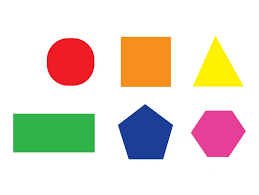

In [10]:
img

convert image to numpy array

In [11]:
data = np.asarray(img)
print(data.shape)

(195, 259)


### Apply Singular Value Decomposition to the image

In [92]:
U,S,V_t = np.linalg.svd(data)

print(f"\tShape of U: {U.shape}\n\tShape of S: {S.shape}\n\tShape of V transpose: {V_t.shape}")

	Shape of U: (195, 195)
	Shape of S: (195,)
	Shape of V transpose: (259, 259)


### Creating low rank approximation of the image

A function for low rank approximation of the image

In [60]:
def low_rank_approx(data, rank):
    U,S,V_t = np.linalg.svd(data, full_matrices=True)
    return np.dot(U[:,:rank], V_t[:rank,:]) * S[rank]

Taking the low rank approximation of the image to an array from rank 1 to rank 10

In [93]:
rank_arr = []

for i in range(1, 11):
    r = low_rank_approx(data, i)
    rank_arr.append(r)



ploting the low rank approximation of the image for rank 1 to rank 10

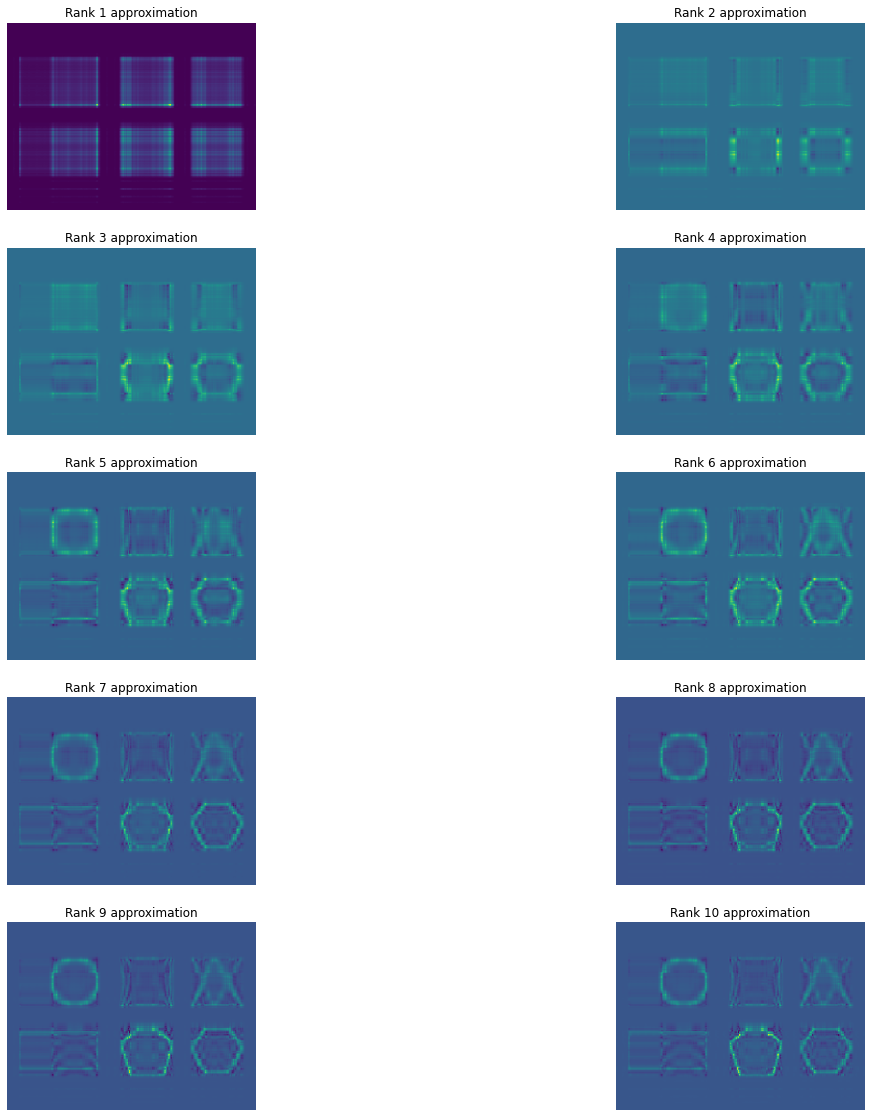

In [95]:
fig, axs =  plt.subplots(5, 2, figsize=(20,20))
for i in range(0, 10):
    axs[i//2, i%2].imshow(rank_arr[i])
    axs[i//2, i%2].set_title(f"Rank {i+1} approximation")
    axs[i//2, i%2].axis('off')